**Latihan 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE

In [ ]:
###dataset  nya

data = {
    "Suhu": [10, 25, 15, 18, 30, 20, 22, 24],
    "Angin": [0, 5, 7, 5, 0, 10, 7, 6],
    "Kelas": ["Dingin", "Panas", "Dingin", "Dingin", "Panas", "Dingin", "Dingin", "Panas"]
}

df = pd.DataFrame(data)

In [ ]:
test_suhu = 16
test_angin = 3

In [ ]:
distances = []
for i in range(len(df)):
    d = math.sqrt((df["Suhu"][i] - test_suhu)**2 + (df["Angin"][i] - test_angin)**2)
    distances.append(d)

df["Jarak"] = distances

In [ ]:
print("Data dengan Jarak")
print(df)

Data dengan Jarak
   Suhu  Angin   Kelas      Jarak
0    10      0  Dingin   6.708204
1    25      5   Panas   9.219544
2    15      7  Dingin   4.123106
3    18      5  Dingin   2.828427
4    30      0   Panas  14.317821
5    20     10  Dingin   8.062258
6    22      7  Dingin   7.211103
7    24      6   Panas   8.544004


In [ ]:
K = 3

In [ ]:
neighbors = df.sort_values("Jarak").head(K)

In [ ]:
print("\nTetangga Terdekat")
print(neighbors)


Tetangga Terdekat
   Suhu  Angin   Kelas     Jarak
3    18      5  Dingin  2.828427
2    15      7  Dingin  4.123106
0    10      0  Dingin  6.708204


In [ ]:
### data test nya

prediction = neighbors["Kelas"].mode()[0]

In [ ]:
print("\nPrediksi Untuk Suhu 16°C & Angin 3 km/jam")
print("Hasil:", prediction)


Prediksi Untuk Suhu 16°C & Angin 3 km/jam
Hasil: Dingin


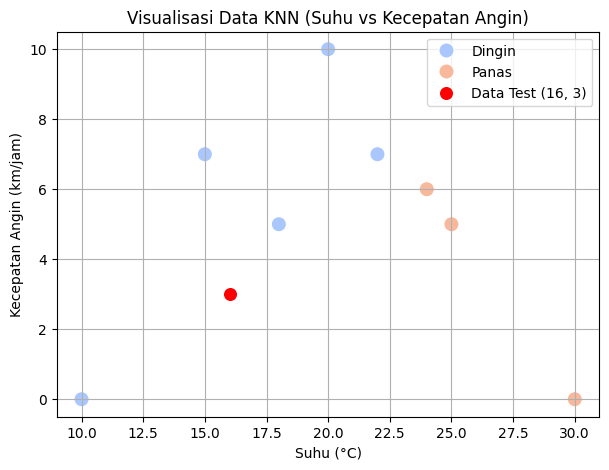

In [ ]:
plt.figure(figsize=(7,5))

# Scatter plot data training
sns.scatterplot(
    data=df,
    x="Suhu",
    y="Angin",
    hue="Kelas",
    palette="coolwarm",
    s=120
)

# titik data test
plt.scatter(test_suhu, test_angin, color="red", s=70, label="Data Test (16, 3)")

plt.title("Visualisasi Data KNN (Suhu vs Kecepatan Angin)")
plt.xlabel("Suhu (°C)")
plt.ylabel("Kecepatan Angin (km/jam)")
plt.legend()
plt.grid(True)
plt.show()

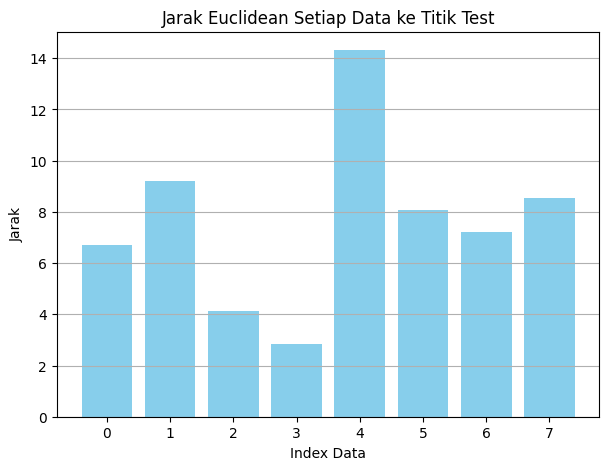

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(df.index, df["Jarak"], color="skyblue")
plt.title("Jarak Euclidean Setiap Data ke Titik Test")
plt.xlabel("Index Data")
plt.ylabel("Jarak")
plt.grid(axis='y')
plt.show()

**Latihan 2**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
nim = ["TI001","TI002","TI003","TI004","TI005","TI006","TI007","TI008","TI009","TI010"]
actual = ["Lulus","Lulus","Lulus","Lulus","Lulus","Tidak Lulus","Tidak Lulus","Tidak Lulus","Tidak Lulus","Lulus"]
predicted = ["Lulus","Lulus","Lulus","Tidak Lulus","Tidak Lulus","Lulus","Tidak Lulus","Tidak Lulus","Tidak Lulus","Lulus"]


In [ ]:
df2 = pd.DataFrame({
    "NIM": nim,
    "Actual": actual,
    "Prediksi": predicted
})

print(" Data : ")
print(df2)

 Data : 
     NIM       Actual     Prediksi
0  TI001        Lulus        Lulus
1  TI002        Lulus        Lulus
2  TI003        Lulus        Lulus
3  TI004        Lulus  Tidak Lulus
4  TI005        Lulus  Tidak Lulus
5  TI006  Tidak Lulus        Lulus
6  TI007  Tidak Lulus  Tidak Lulus
7  TI008  Tidak Lulus  Tidak Lulus
8  TI009  Tidak Lulus  Tidak Lulus
9  TI010        Lulus        Lulus


In [ ]:
labels = ["Lulus", "Tidak Lulus"]
cm = confusion_matrix(actual, predicted, labels=labels)
print("\n Confusion Matrix ")
print(cm)


 Confusion Matrix 
[[4 2]
 [1 3]]


In [ ]:
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, pos_label="Lulus")
recall = recall_score(actual, predicted, pos_label="Lulus")

print("\n Evaluasi ")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)


=== Evaluasi ===
Accuracy : 0.7
Precision: 0.8
Recall   : 0.6666666666666666


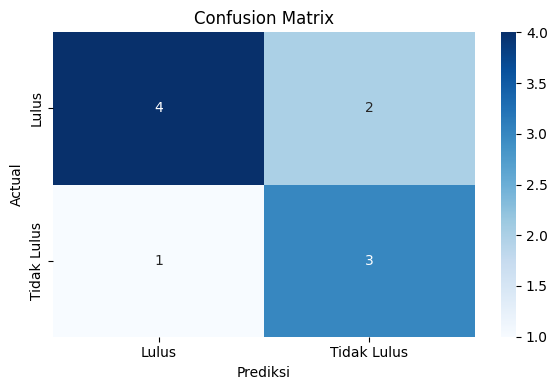

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

**Latihan 3**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [47]:
df3 = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum10/data/weather_classification_data.csv')

df3.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [50]:
label_cols = ["Cloud Cover", "Season", "Location", "Weather Type"]
le_dict = {}


for col in label_cols:
    le = LabelEncoder()
    df3[col] = le.fit_transform(df3[col])
    le_dict[col] = le

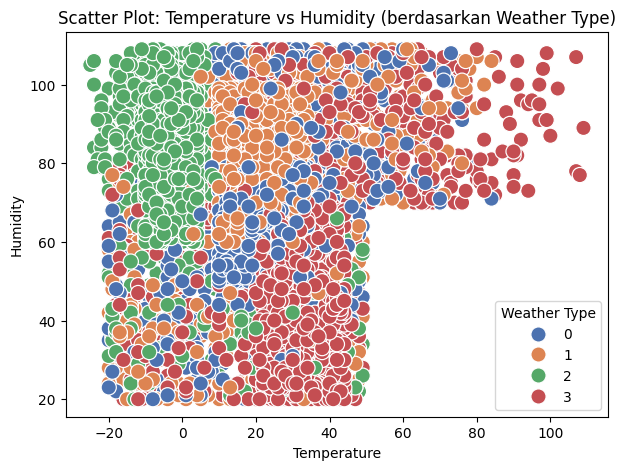

In [52]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df3, x="Temperature", y="Humidity",
                hue=df3["Weather Type"], palette="deep", s=120)
plt.title("Scatter Plot: Temperature vs Humidity (berdasarkan Weather Type)")
plt.show()


/tmp/ipython-input-36084305.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df3["Weather Type"], palette="deep")


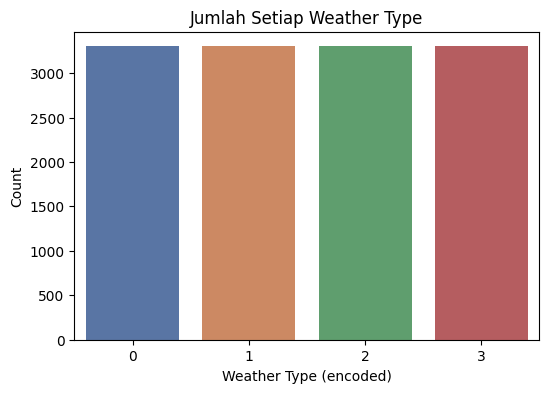

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(x=df3["Weather Type"], palette="deep")
plt.title("Jumlah Setiap Weather Type")
plt.xlabel("Weather Type (encoded)")
plt.ylabel("Count")
plt.show()

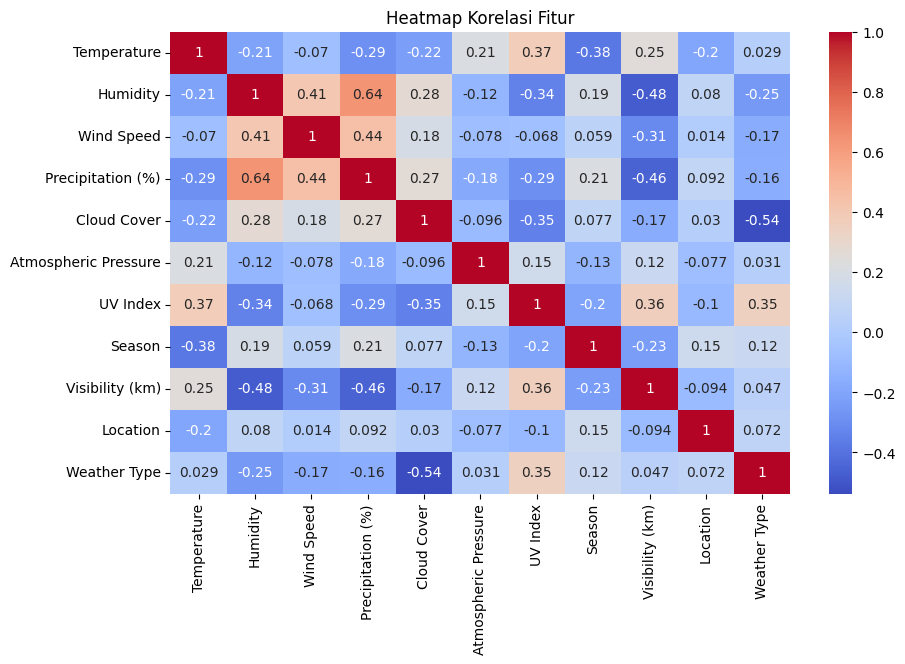

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(df3.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur")
plt.show()

In [58]:
X = df3.drop(columns=["Weather Type"])
y = df3["Weather Type"]

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=3)